In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
%config Completer.use_jedi = False

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('data_10000trcs.txt').drop('Unnamed: 0', axis=1)
df.head()

,N,i2f,numba,cupy,segyio
0,0,0.000015,0.000024,0.000316,0.000012
1,10,0.000065,0.000151,0.000133,0.000146
2,20,0.000096,0.000231,0.000154,0.000206
3,30,0.000146,0.000262,0.000183,0.000299
4,40,0.000194,0.000319,0.000206,0.000362


Text(0, 0.5, 'total time (ms)')

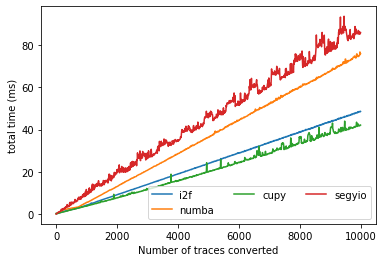

In [7]:
cols = df.columns[1:]
for col in cols:
    plt.plot(df["N"],df[col]*1000, label=col)
#     plt.plot(df["N"],df[col], label=col)
plt.legend(bbox_to_anchor=(1,0), loc="lower right", ncol=3)
plt.xlabel("Number of traces converted")
plt.ylabel("total time (ms)")
# plt.title("Comparing read speeds of three fastest methods (log time)")
# plt.savefig("Time read 1000 traces 3 mthods logtime.png",format='png')

In [14]:
from scipy.signal import savgol_filter
df.cupy = savgol_filter(df.cupy, 51, 3)
df.segyio = savgol_filter(df.segyio, 101, 3)

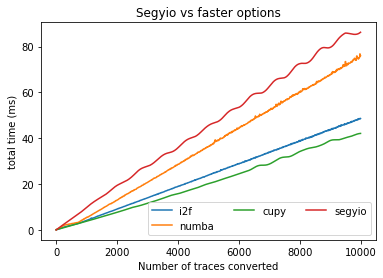

In [16]:
cols = df.columns[1:]
for col in cols:
    plt.plot(df["N"],df[col]*1000, label=col)
#     plt.plot(df["N"],df[col], label=col)
plt.legend(bbox_to_anchor=(1,0), loc="lower right", ncol=3)
plt.xlabel("Number of traces converted")
plt.ylabel("total time (ms)")
plt.title("Segyio vs faster options")
plt.savefig("Segyio vs faster options.png",format='png')